### 2021321148 INSIK CHO

## 0. Install packages and load data

In [32]:
# I installed needed packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

In [33]:
# set initial df, to be adjacency matrix ,
df = np.zeros((34,34))

# I wrote code to transform adjacency list into adjacency matrix
with open("Assignment4.adjlist") as file:
    for _ in range(3):
        next(file)
        
# For every line of file, find pair and give 1 to pair
    for line in file:
        node = list(map(int, line.split()))
        i = node[0]
        for j in node[1:]:
            df[i][j] = 1
            df[j][i] = 1
    file.close()
    
#check the result    
df

array([[0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

## 1. Perform Matrix Formalization

### Define Matrix Formalization class

In [42]:
# Define the class for MatrixFactoriztion
class MatrixFactorization():
    
# "Define _init_ to set initial variables. 
    """
    A : adjacency matrix
    epoch : How many epochs
    d : dimension of embedding vector (set default 4, suggested by assignment)
    lr : learning rate (set 0.01 as default, no reason)
    random_state : ranom_state, just to incorporate choice for randomness
    """
    def __init__(self, A,  epoch, d = 4, lr=0.01,random_state = 42):
        self.A = A
        self.d = d
        self.lr = lr
        self.epoch = epoch
        np.random.seed(random_state)
        
        """ 
        self.U and self.V are initial setting for z_u and z_v. 
        I give them random values, made on normal dist.
        """
        self.U = np.random.normal(0,0.03, [A.shape[0], d])
        self.V = self.U.T

        """
        I iterated the matrix by pair of (i,j). 
        So,  convenience later, I made index matrix
        """
        # get length of Adjacency matrix
        index_i = range(A.shape[0]) ;index_j = range(A.shape[0])
        A_index = []
        # Put all paris into index matrix 
        for i in index_i:
            for j in index_j:
                A_index.append((i,j))
        # Randomly shuffle the index to give more randomness
        np.random.shuffle(A_index)
        self.index = A_index
        self.cost = []
        
    """ 
    Iterate over indexes
    calculate z_u * z_v, and calculate the diffrence with real adjacency matrix, 
    do backpropagetion , repeat with (j,i) again
    """    
    def sgd(self):
        cost = []
        for epoch in range(self.epoch):
            for i,j in self.index:
                #propagation
                A_ij_hat = np.dot(self.U[i] , self.V[:,j])
                #calculate gradient
                grad_u = (self.A[i][j] - A_ij_hat) * self.V[:,j]
                grad_v = (self.A[i][j] - A_ij_hat) * self.U[i]
                #backpropagation
                self.U[i]   += self.lr * grad_u
                self.V[:,j] += self.lr * grad_v
            #repeat for (j,i)
                #propagation
                A_ji_hat = np.dot(self.U[i] , self.V[:,j])
                #calculate gradient
                grad_u2 = (self.A[j][i] - A_ij_hat) * self.V[:,i]
                grad_v2 = (self.A[j][i] - A_ij_hat) * self.U[j]
                #backpropagation
                self.U[j]   += self.lr * grad_u2
                self.V[:,i] += self.lr * grad_v2

            #The resulted embedding matrix
            A_hat = np.dot(self.U , self.V)
            # get cost for each epochs
            self.cost.append(np.sum((self.A-A_hat)**2/np.prod(self.A.shape)))
                
                

### fitting using class

In [43]:
#Implemnt the matrixfactorization with 500 epochs
MF = MatrixFactorization(A = df, epoch = 500)
MF.sgd()

## graphing the convergence

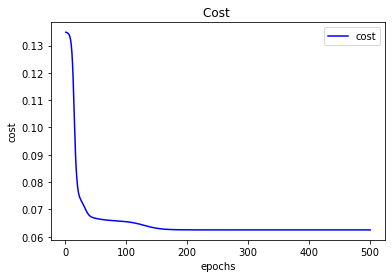

In [45]:
#create graph with 500 epochs
xlim = range(1,501)
plt.plot(xlim, MF.cost,'b',label="cost")
plt.xlabel("epochs")
plt.ylabel("cost")
plt.legend()
plt.title("Cost ")
plt.show()

As epochs increase, ite converges. Also, it looks like convergence is over around 150~200. good result

### result embedding matrix

In [47]:
# Just to check the result embedding vector
print(MF.U)

[[ 0.00477908 -0.60843867 -0.4216968   1.02584976]
 [-0.51427754 -0.50156029  0.08158946  0.68840594]
 [-0.68485042 -0.48357544 -0.18650737  0.4756937 ]
 [-0.41321276 -0.55678724  0.09026842  0.51959553]
 [ 0.40175611 -0.05899466 -0.31315624  0.42402568]
 [ 0.54137129 -0.0095646  -0.39949233  0.50911418]
 [ 0.5360211  -0.00700263 -0.39178441  0.49991786]
 [-0.31845759 -0.45764645  0.07247415  0.42181986]
 [-0.39733303  0.1620958  -0.31075317  0.38099873]
 [-0.27385838  0.00601312 -0.11935808  0.06394331]
 [ 0.40409755 -0.06038201 -0.31560766  0.42766168]
 [ 0.06422593 -0.11439716 -0.08758045  0.19103101]
 [-0.04265727 -0.24847851 -0.02471597  0.26181932]
 [-0.44672918 -0.32558686 -0.06232091  0.43788442]
 [-0.22738877  0.28576831 -0.24920353  0.05790592]
 [-0.21850424  0.28327532 -0.23845517  0.05806851]
 [ 0.38086054  0.08130531 -0.24672892  0.25672654]
 [-0.05333514 -0.20875999 -0.01235063  0.30797823]
 [-0.22811151  0.28876724 -0.24433155  0.06255039]
 [-0.19761401 -0.08812584 -0.15

## 2. Visualization with t-SNE

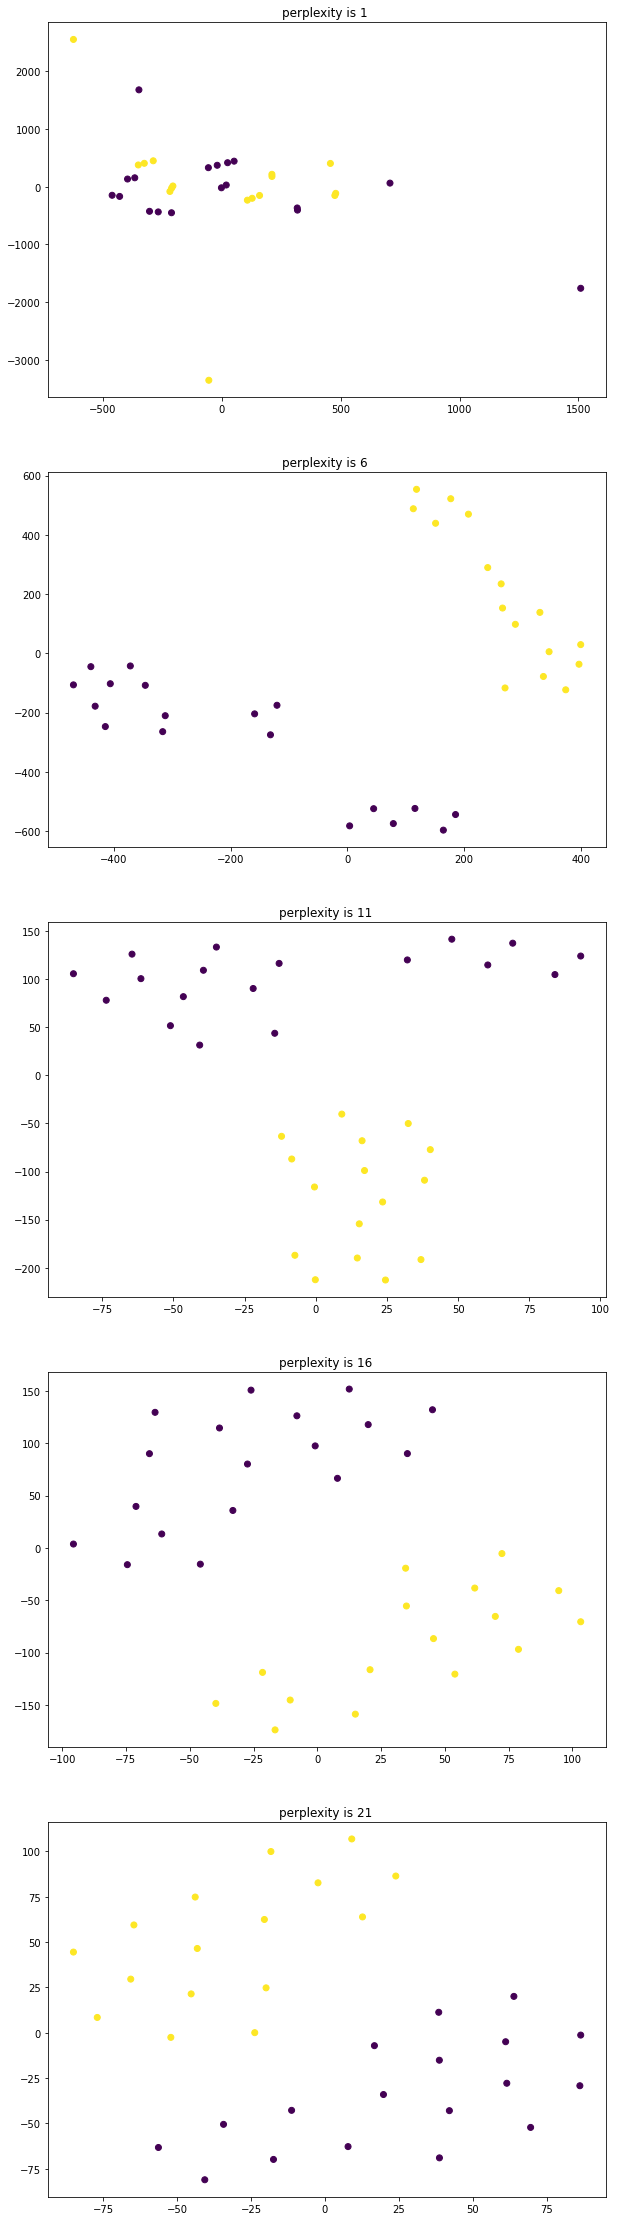

In [50]:
# I draw t-SNE graph for perplexity : 1,6,11,16,21,26,31,36,41,46
import warnings
warnings.filterwarnings(action='ignore')
label = np.loadtxt("karate_label.txt")

#1,6,11,16,21
perplexity = np.arange(1,25,5)

#The code to draw 5 graphs
fig, axes =plt.subplots(5, figsize=(10,40))
for i in range(5):
    tsne = TSNE(n_components = 2, perplexity = perplexity[i], metric = 'cosine')
    y = tsne.fit_transform(MF.U)
    x = y[:,0]
    y = y[:,1]
    axes[i].scatter(x,y, c=label[:,1])
    axes[i].title.set_text('perplexity is {} '.format(perplexity[i]))
    

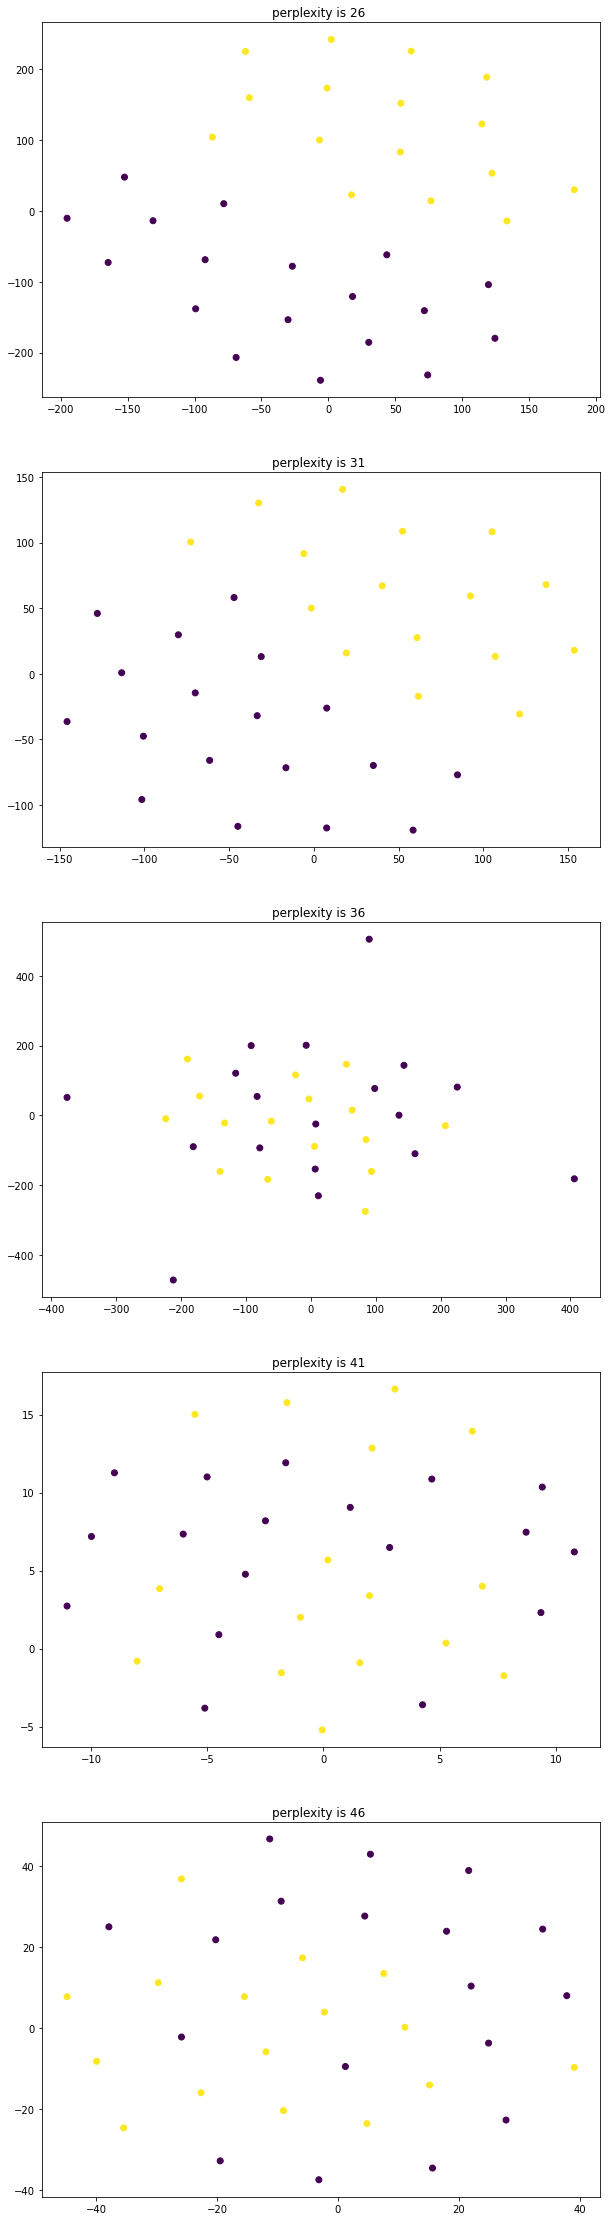

In [51]:
#26,31,36,41,46
perplexity = np.arange(26,51,5)

#The code to draw 5 more graphs
fig, axes =plt.subplots(5, figsize=(10,40))
for i in range(5):
    tsne = TSNE(n_components = 2, perplexity = perplexity[i], metric = 'cosine')
    y = tsne.fit_transform(MF.U)
    x = y[:,0]
    y = y[:,1]
    axes[i].scatter(x,y, c=label[:,1])
    axes[i].title.set_text('perplexity is {} '.format(perplexity[i]))
    

We can get two results from graphs.

1. At perplexity 1, the grouping was not in effect. Maybe one neighbor is not enough to find its real group

2. As perplexity go beyond 30, the grouping breaks. Thay should be true, because there are two groups and 34 datas, 

if the perplexity goes beyond like 30, 
all samples would look same from t-SNE